Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) 

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def analyze_and_visualize(df):
    # Define features for analysis.
    features = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'HS', 'Bat_Ave', 'BF', 'Bat_SR', 
                "100's", "50's", "Zeros", '4s', '6s', 'Bowl_Mat', 'Bowl_Inns', 'Overs', 'Mdns', 'Bowl_Runs', 
                'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
    
    # Check if all features exist in the DataFrame
    missing_features = [col for col in features if col not in df.columns]
    if missing_features:
        raise ValueError(f"The following required columns are missing in the DataFrame: {missing_features}")
    
    # Select features from the DataFrame
    df_analysis = df[features]
    
    # Replace infinities and NaN values with 0
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)
    
    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    
    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Matrix of Features')
    plt.show()
    
    return df_analysis

In [6]:
def calculate_allrounder_formula_components(df):
    """
    Calculates the components of the All-Rounder Consistency Score formula.
    
    Consistency Score All-Rounder Score = (Batting Consistency Score + Bowling Consistency Score) / 2 
    """
    df_components = df.copy()
    # Ensure numeric types for calculations (handle potential NaN from coercion)
    df_components['Bat_Mat'] = pd.to_numeric(df_components['Bat_Mat'], errors='coerce')
    df_components['Bat_Inns'] = pd.to_numeric(df_components['Bat_Inns'], errors='coerce')
    df_components['NO'] = pd.to_numeric(df_components['NO'], errors='coerce')
    df_components['Bat_Runs'] = pd.to_numeric(df_components['Bat_Runs'], errors='coerce')
    df_components['BF'] = pd.to_numeric(df_components['BF'], errors='coerce')
    df_components['Bat_Ave'] = pd.to_numeric(df_components['Bat_Ave'], errors='coerce')
    df_components["100's"] = pd.to_numeric(df_components["100's"], errors='coerce')
    df_components["50's"] = pd.to_numeric(df_components["50's"], errors='coerce')
    df_components["Zeros"] = pd.to_numeric(df_components["Zeros"], errors='coerce')
    df_components['Bowl_Inns'] = pd.to_numeric(df_components['Bowl_Inns'], errors='coerce')
    df_components['Bowl_Mat'] = pd.to_numeric(df_components['Bowl_Mat'], errors='coerce')
    df_components['Overs'] = pd.to_numeric(df_components['Overs'], errors='coerce')
    df_components['Wkts'] = pd.to_numeric(df_components['Wkts'], errors='coerce')
    df_components['Bowl_Ave'] = pd.to_numeric(df_components['Bowl_Ave'], errors='coerce')
    df_components['Econ'] = pd.to_numeric(df_components['Econ'], errors='coerce')
    df_components['Bowl_SR'] = pd.to_numeric(df_components['Bowl_SR'], errors='coerce')
    df_components['4W'] = pd.to_numeric(df_components['4W'], errors='coerce')
    df_components['5W'] = pd.to_numeric(df_components['5W'], errors='coerce')

    
    

    # Perform calculations, ensure float division and handle potential NaN values
    df_components['Inns_per_Mat_Bat'] = df_components['Bat_Inns'].astype(float) / df_components['Bat_Mat'].astype(float)
    df_components['NO_per_Inns'] = df_components['NO'].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Runs_per_BF'] = df_components['Bat_Runs'].astype(float) / df_components['BF'].astype(float)
    df_components['Ave_Score_Bat'] = df_components['Bat_Ave'].astype(float)  # Direct Ave
    df_components['50s100s_per_Inns'] = (df_components["50's"].astype(float) + 2 * df_components["100's"].astype(float)) / df_components['Bat_Inns'].astype(float)
    df_components['Zeros_per_Inns'] = df_components["Zeros"].astype(float) / df_components['Bat_Inns'].astype(float)
    df_components['Inns_per_Mat_bowl'] = df_components['Bowl_Inns'].astype(float) / df_components['Bowl_Mat'].astype(float) # Ensure float division
    df_components['Overs_per_Mat'] = df_components['Overs'].astype(float) / df_components['Bowl_Mat'].astype(float)
    df_components['Wkts_per_Overs'] = df_components['Wkts'].astype(float) / df_components['Overs'].astype(float)
    df_components['Ave_Score_Bowl'] = df_components['Bowl_Ave'].astype(float)  # Direct Ave
    df_components['Econ_Rate'] = df_components['Econ'].astype(float)  # Direct Econ
    df_components['SR_per_100'] = df_components['Bowl_SR'].astype(float) / 100
    df_components['4W5W_per_Mat'] = (df_components['4W'].astype(float) + df_components['5W'].astype(float)) / df_components['Bowl_Mat'].astype(float)

    return df_components


In [7]:
data = pd.read_excel("../../all season cleaned data/allrounderset_ipl.xlsx")
df = data.copy()
print("Data types of your columns before calculation:")

Data types of your columns before calculation:


In [8]:
numeric_cols = ['Bat_Mat', 'Bat_Inns', 'NO', 'Bat_Runs', 'BF', 'Bat_Ave', "100's", "50's", "Zeros", 'Bowl_Inns', 'Bowl_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Use df here

# Verify data types AFTER explicit conversion
print("\nData types of your columns AFTER explicit numeric conversion:")
print(df.dtypes) # Use df here

# --- Correctly Remove Rows with NaN Values ---
cols_to_check_nan = ['Bat_Inns', 'Bowl_Inns', 'Bat_Mat', 'Overs', 'Wkts', 'Bowl_Ave', 'Econ', 'Bowl_SR', '4W', '5W']
print("\nNumber of NaN values BEFORE removing:")
print(df[cols_to_check_nan].isna().sum()) # Check NaN counts in relevant columns before removal

df_cleaned = df.dropna(subset=cols_to_check_nan, how='any') # Use how='any' to drop row if ANY of these cols is NaN
print("\nNumber of rows BEFORE removing NaNs:", len(df))
print("Number of rows AFTER removing NaNs:", len(df_cleaned)) # Print length of df_cleaned


# Calculate bowler formula components using the CLEANED data (df_cleaned)
calculations_with_data = calculate_allrounder_formula_components(df_cleaned) # Pass df_cleaned

# Select the component columns for correlation analysis
component_columns = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat'
]

# Calculate the correlation matrix for the components
correlation_matrix = calculations_with_data[component_columns].corr() # Use calculations_with_data

# Display the correlation matrix
print("\nCorrelation Matrix of Bowler Consistency Formula Components (after NaN removal):")
print(correlation_matrix)


Data types of your columns AFTER explicit numeric conversion:
Player            object
Span              object
Catches Taken      int64
Bat_Mat            int64
Bat_Inns         float64
NO               float64
Bat_Runs         float64
HS                object
Bat_Ave          float64
BF               float64
Bat_SR            object
100's            float64
50's             float64
Zeros            float64
4s                object
6s                object
Bowl_Mat           int64
Bowl_Inns        float64
Overs            float64
Mdns              object
Bowl_Runs         object
Wkts             float64
Bowl_Ave         float64
Econ             float64
Bowl_SR          float64
4W               float64
5W               float64
dtype: object

Number of NaN values BEFORE removing:
Bat_Inns      1
Bowl_Inns     6
Bat_Mat       0
Overs         6
Wkts          6
Bowl_Ave     11
Econ          6
Bowl_SR      11
4W            6
5W            6
dtype: int64

Number of rows BEFORE removing NaNs

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_allrounder_consistency_components(df_components):
    features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat'
    ]
    df_analysis = df_components[features].copy()  # Use .copy() to avoid SettingWithCopyWarning

    # Replace infinities and NaN with 0 - Handle potential issues from calculations
    df_analysis = df_analysis.replace([np.inf, -np.inf], 0)
    df_analysis = df_analysis.fillna(0)

    # Correlation Analysis
    correlation_matrix = df_analysis.corr()
    print(correlation_matrix)

    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)  # Added fmt and linewidths for better readability
    plt.title('Correlation Matrix of Allrounder Consistency Formula Components')
    plt.show()

    return df_analysis


                   Inns_per_Mat_Bat  NO_per_Inns  Runs_per_BF  Ave_Score_Bat  \
Inns_per_Mat_Bat           1.000000    -0.525949     0.471150       0.727629   
NO_per_Inns               -0.525949     1.000000    -0.295920      -0.322878   
Runs_per_BF                0.471150    -0.295920     1.000000       0.575296   
Ave_Score_Bat              0.727629    -0.322878     0.575296       1.000000   
50s100s_per_Inns           0.630162    -0.444781     0.414610       0.696330   
Zeros_per_Inns            -0.209706    -0.107917    -0.326624      -0.489687   
Inns_per_Mat_bowl         -0.570878     0.310852    -0.351065      -0.592971   
Overs_per_Mat             -0.637655     0.411408    -0.389456      -0.609060   
Wkts_per_Overs            -0.067074     0.059116     0.287861       0.108914   
Ave_Score_Bowl             0.075920    -0.009668    -0.143808      -0.007974   
Econ_Rate                  0.204382    -0.021944     0.251692       0.129453   
SR_per_100                -0.007218    -

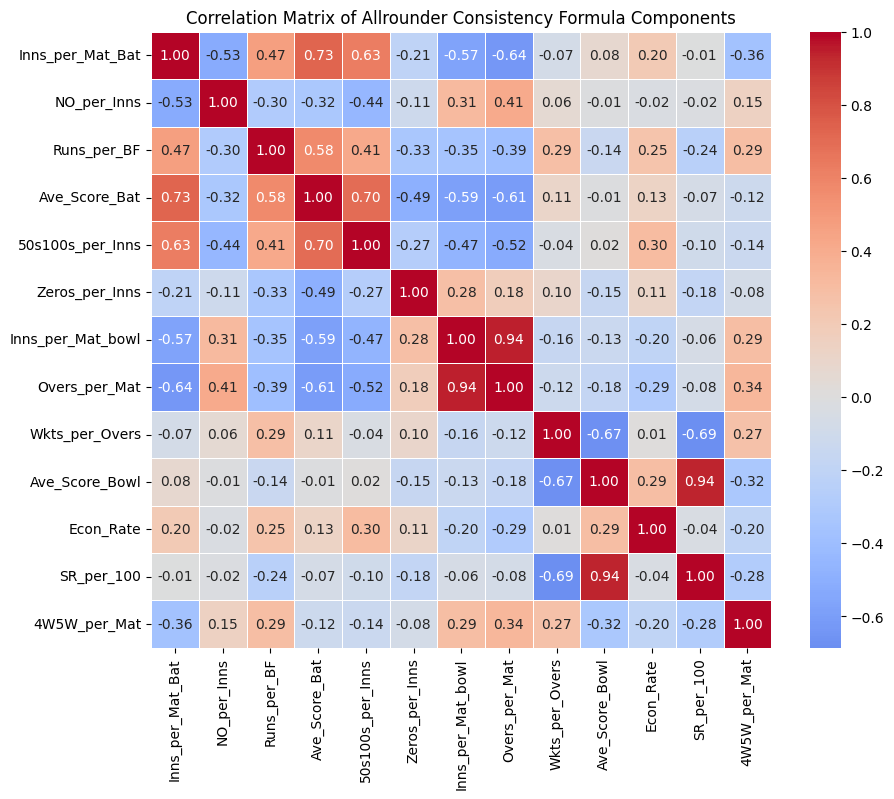

In [10]:
analyzed_df = analyze_allrounder_consistency_components(calculations_with_data)


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy.optimize as opt

# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat'
]

# Prepare the data: fill any NaN and standardize the features
df_pca = calculations_with_data[features].fillna(0)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

# Run PCA
pca = PCA(n_components=len(features))
principal_components = pca.fit_transform(X_scaled)

# Create a DataFrame of loadings
loadings = pd.DataFrame(pca.components_.T, 
                        columns=[f'PC{i+1}' for i in range(len(features))],
                        index=features)
print("PCA Loadings (each column is a principal component):")
print(loadings)

# Extract PC1 loadings and normalize
pc1_loadings = loadings['PC1']
pca_weights = (np.abs(pc1_loadings) / np.abs(pc1_loadings).sum()).sort_values(ascending=False)
print("\nSuggested Weights from PCA (based on PC1 loadings):")
print(pca_weights)

# AHP Pairwise Comparison Matrix (example values)
pairwise_matrix = np.array([
    [1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11,  12,  13],
    [1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11,  12],
    [1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10,  11],
    [1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9,   10],
    [1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8,   9],
    [1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7,   8],
    [1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6,   7],
    [1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5,   6],
    [1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4,   5],
    [1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3,   4],
    [1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2,   3],
    [1/12,1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1,   2],
    [1/13,1/12,1/11,1/10,1/9, 1/8, 1/7, 1/6, 1/5, 1/4, 1/3, 1/2, 1]
])


# Calculate AHP weights
eigvals, eigvecs = np.linalg.eig(pairwise_matrix)
max_eigval_index = np.argmax(eigvals.real)
ahp_weights = eigvecs[:, max_eigval_index].real
ahp_weights = ahp_weights / ahp_weights.sum()

ahp_weights_series = pd.Series(ahp_weights, index=features)
print("\nWeights from AHP based on expert pairwise comparisons:")
print(ahp_weights_series)

# Optimization-Based Approach
def consistency_score(weights, df):
    return np.dot(df[features].values, weights)

def objective(weights, df):
    scores = consistency_score(weights, df)
    return -np.var(scores)

initial_weights = np.ones(len(features)) / len(features)
bounds = [(0, 1)] * len(features)

result = opt.minimize(objective, initial_weights, args=(df_pca,), bounds=bounds)
optimized_weights = result.x / result.x.sum()

optimized_weights_series = pd.Series(optimized_weights, index=features)
print("\nOptimized Weights from the Objective Function (maximizing variance):")
print(optimized_weights_series)


PCA Loadings (each column is a principal component):
                        PC1       PC2       PC3       PC4       PC5       PC6  \
Inns_per_Mat_Bat  -0.402204  0.016566  0.082539 -0.203913  0.098432 -0.194151   
NO_per_Inns        0.254060  0.002542 -0.242266  0.508305 -0.392636 -0.340090   
Runs_per_BF       -0.285817 -0.242090 -0.271943  0.191406  0.331956  0.247026   
Ave_Score_Bat     -0.402281 -0.082891 -0.223748 -0.064207 -0.032504 -0.226450   
50s100s_per_Inns  -0.367057 -0.040838 -0.016341 -0.059898  0.271452 -0.345337   
Zeros_per_Inns     0.174923 -0.045495  0.667451 -0.042761  0.229636  0.233105   
Inns_per_Mat_bowl  0.386126 -0.015981 -0.072967 -0.092810  0.431546 -0.302963   
Overs_per_Mat      0.407342 -0.034239 -0.161238 -0.093052  0.298153 -0.313870   
Wkts_per_Overs    -0.021910 -0.487537  0.117374  0.195279 -0.287100  0.193220   
Ave_Score_Bowl    -0.066649  0.547593 -0.096649  0.220696  0.104304  0.199714   
Econ_Rate         -0.157883  0.065780  0.290385  0.73612

In [14]:
import pandas as pd

# Full list of all-rounder metrics
features_allrounder = ['Inns_per_Mat_Bat', 'NO_per_Inns', 'Runs_per_BF', 'Ave_Score_Bat',
                        '50s100s_per_Inns', 'Zeros_per_Inns', 'Inns_per_Mat_bowl', 'Overs_per_Mat',
                        'Wkts_per_Overs', 'Ave_Score_Bowl', 'Econ_Rate', 'SR_per_100',
                        '4W5W_per_Mat']

# Original AHP weights for all-rounder metrics
ahp_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.257672,
    'NO_per_Inns': 0.195735,
    'Runs_per_BF': 0.146862,
    'Ave_Score_Bat': 0.109376,
    '50s100s_per_Inns': 0.081029,
    'Zeros_per_Inns': 0.059793,
    'Inns_per_Mat_bowl': 0.044006,
    'Overs_per_Mat': 0.032355,
    'Wkts_per_Overs': 0.023828,
    'Ave_Score_Bowl': 0.017656,
    'Econ_Rate': 0.013261,
    'SR_per_100': 0.010216,
    '4W5W_per_Mat': 0.008211
})

# PCA weights for all-rounder metrics (from PC1 loadings)
pca_weights_allrounder = pd.Series({
    'Inns_per_Mat_Bat': 0.130698,
    'NO_per_Inns': 0.082558,
    'Runs_per_BF': 0.092877,
    'Ave_Score_Bat': 0.130723,
    '50s100s_per_Inns': 0.119277,
    'Zeros_per_Inns': 0.056842,
    'Inns_per_Mat_bowl': 0.125473,
    'Overs_per_Mat': 0.132367,
    'Wkts_per_Overs': 0.007120,
    'Ave_Score_Bowl': 0.021658,
    'Econ_Rate': 0.051305,
    'SR_per_100': 0.003305,
    '4W5W_per_Mat': 0.045797
})

# Normalize AHP and PCA weights
ahp_weights_norm_allrounder = ahp_weights_allrounder / ahp_weights_allrounder.sum()
pca_weights_norm_allrounder = pca_weights_allrounder / pca_weights_allrounder.sum()

# Define hybrid weighting factor (alpha) between AHP and PCA
alpha = 0.7  # 70% AHP and 30% PCA

# Compute the hybrid weights for all-rounder metrics
hybrid_weights_allrounder = alpha * ahp_weights_norm_allrounder + (1 - alpha) * pca_weights_norm_allrounder

# Define boost factors for specific all-rounder metrics
boost_factors_allrounder = {
    'Inns_per_Mat_Bat': 1.0,
    'NO_per_Inns': 1.0,
    'Runs_per_BF': 2.0,
    'Ave_Score_Bat': 2.0,
    '50s100s_per_Inns': 2.0,
    'Zeros_per_Inns': 1.0,
    'Inns_per_Mat_bowl': 1.5,
    'Overs_per_Mat': 1.5,
    'Wkts_per_Overs': 1.5,
    'Ave_Score_Bowl': 1.5,
    'Econ_Rate': 1.5,
    'SR_per_100': 1.0,
    '4W5W_per_Mat': 1.5
}

# Apply the boost factors
hybrid_weights_boosted_allrounder = hybrid_weights_allrounder * pd.Series(boost_factors_allrounder)

# Normalize again to ensure the weights sum to exactly 1
hybrid_weights_boosted_allrounder /= hybrid_weights_boosted_allrounder.sum()

# Verify that the sum of weights is exactly 1
sum_of_weights_allrounder = hybrid_weights_boosted_allrounder.sum()

# Output results
hybrid_weights_boosted_allrounder, sum_of_weights_allrounder


(Inns_per_Mat_Bat     0.151930
 NO_per_Inns          0.111939
 Runs_per_BF          0.180820
 Ave_Score_Bat        0.160219
 50s100s_per_Inns     0.128009
 Zeros_per_Inns       0.040759
 Inns_per_Mat_bowl    0.071038
 Overs_per_Mat        0.064720
 Wkts_per_Overs       0.019528
 Ave_Score_Bowl       0.019571
 Econ_Rate            0.025609
 SR_per_100           0.005634
 4W5W_per_Mat         0.020225
 dtype: float64,
 1.0)

ValueError: autodetected range of [nan, nan] is not finite

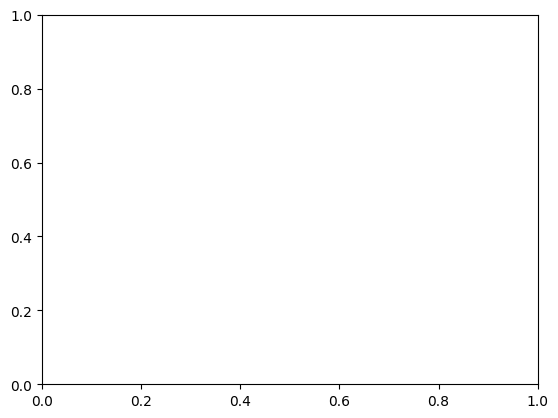

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'calculations_with_data' is your DataFrame containing the all-rounder derived metrics
# and 'hybrid_weights_boosted' is your final weight Series with the index corresponding to:
# Features for all-rounders
features = [
    'Inns_per_Mat_Bat',
    'NO_per_Inns',
    'Runs_per_BF',
    'Ave_Score_Bat',
    '50s100s_per_Inns',
    'Zeros_per_Inns',
    'Inns_per_Mat_bowl',
    'Overs_per_Mat',
    'Wkts_per_Overs',
    'Ave_Score_Bowl',
    'Econ_Rate',
    'SR_per_100',
    '4W5W_per_Mat'
]

# Define a function to compute the composite consistency score for all-rounders
def compute_consistency_score(df, weights):
    # Make sure the DataFrame columns are in the same order as weights.index
    return np.dot(df[weights.index].values, weights.values)

# Compute the base consistency scores with your nominal all-rounder weights
base_scores = compute_consistency_score(calculations_with_data, hybrid_weights_boosted_allrounder)


# Set up sensitivity analysis parameters
n_iterations = 100  # Number of perturbation iterations
perturbation_factor = 0.05  # 5% noise
perturbed_scores_list = []

# Generate perturbed weights and compute the corresponding consistency scores
for i in range(n_iterations):
    # Create random noise: normally distributed noise with 0 mean and 5% standard deviation
    noise = np.random.normal(loc=0, scale=perturbation_factor, size=len(hybrid_weights_boosted_allrounder))
    
    # Apply the noise multiplicatively to each weight
    perturbed_weights = hybrid_weights_boosted_allrounder * (1 + noise)
    
    # Renormalize to ensure the weights sum to 1
    perturbed_weights = perturbed_weights / perturbed_weights.sum()
    
    # Compute consistency score with perturbed weights
    perturbed_scores = compute_consistency_score(calculations_with_data, perturbed_weights)
    perturbed_scores_list.append(perturbed_scores)

# For each perturbed set, compute the correlation with the base scores
correlations = [np.corrcoef(base_scores, scores)[0, 1] for scores in perturbed_scores_list]

# Also compute the mean relative difference between perturbed scores and base scores
relative_differences = [
    np.mean(np.abs(scores - base_scores)) / np.mean(np.abs(base_scores))
    for scores in perturbed_scores_list
]

# Plot the distribution of correlation coefficients
plt.hist(correlations, bins=20, edgecolor='k')
plt.title("Correlation between Base and Perturbed All-Rounder Consistency Scores")
plt.xlabel("Correlation coefficient")
plt.ylabel("Frequency")
plt.show()

# Plot the distribution of relative differences
plt.hist(relative_differences, bins=20, edgecolor='k')
plt.title("Relative Differences in All-Rounder Consistency Scores")
plt.xlabel("Relative difference")
plt.ylabel("Frequency")
plt.show()

# Print summary statistics
print("Mean correlation:", np.mean(correlations))
print("Mean relative difference:", np.mean(relative_differences))


# FINAL CONSISTENCY SCORE CALCULATION

### Consistency Score(Batting) = (0.151930 * (Inns/Mat)) + (0.111939 * (NO/Inns)) + (0.180820 * (Runs/BF)) + (0.160219 * Ave) + (0.128009 * ((50s + 2 * 100s)/Inns)) - (0.040759 * (Zeros/Inns))

### Consistency Score (Bowler) = (0.071038 * (Inns / Mat)) + (0.064720 * (Overs / Mat)) + (0.019528 * (Wkts / Overs)) + (0.019571 * (Ave)) + (0.025609 * (Econ)) + (0.005634 * (SR / 100)) + (0.020225 * ((4W + 5W) / Mat))


### Consistency Score(allrounder) = Consistency Score(Batting) + Consistency Score(Bowler)
